<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Максим! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

**Задача** : построить модель, которая по фотографии определит приблизительный возраст человека. В распоряжении набор фотографий людей с указанием возраста.

## Исследовательский анализ данных

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from tensorflow.keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

Загрузим csv разметки:

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

Рассмотрим наш датасет подробнее:

In [3]:
print('Размерность таблицы разметки:',labels.shape)
labels.reset_index(drop = True)

Размерность таблицы разметки: (7591, 2)


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
...,...,...
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Теперь ты знаешь количество фотографий в датасете. Учитывая эту информацию, а также то, что ты знаешь что мы решаем задачу регрессии, попробуй порассуждать, достаточно ли имеющихся данных? Какие шаги мы можем предпринять в связи с этим?   

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
   
В данной выборке всего `7591 объект`, для обучения это **не слишком много** объектов. Например для некоторых возрастов может быть недостаточно данных для точного опредления возраста.

Также для увелчения выборки можно воспользоваться `аугментацией` 

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b>🤝 </div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> ответ ревьюера v2</b>
    
Извини за "провокационный" вопрос, но задал его я специально, т.к. он немного сдвигает парадигму. И если при обучении мы задаем его редко, зато часто возникает на практике.    
    
Понятно, что если мы участвуем в соревнованиях или делаем учебный проект,  то данных скорее всего хватит (и задачу скорее всего кто-то уже решил). Однако, всё становится не так очевидно, когда задача решается в первый раз. Например если нас пригласили в качестве эксперта на переговоры с заказчиком, который хочет "искуственый интеллект", но не сильно ориентируется в том, что нужно.    

На самом деле однозначно понять, достаточно ли фотографий сложно. Очень много зависит от доменной области (медицина или спутниковые снимки), требований заказчика к точности, качества датасета, шумности разметки и т.д.
 
Но прибрести опыт и интуицию, чтобы хотябы приблизительно оценить можно и нужно. Именно поэтому я предложил тебе задуматься над этим вопросом и порассуждать.
    

Давай попробую привести свою оценку. Есть средняя "в вакууме" оценка - 1000 изображений на класс для задачи классификации. Мы решаем задачу регрессии, нужно получить mae меньше 8. Можно представить близкую задачу классификации на 15 классов, которая дает похожую точность. В этом случае нам нужно 15000 изображений, т.е.в два раза больше чем у нас есть. Но хорошая новость - в два раза это не в десять, к тому же мы можем использовать отражения, поэтому по предварительной оценке данных должно хвататить.

Ну а если мы понимаем, что данных мало, и нас не спасут аугментация и предобученные модели, то выход один - исследовать возмжоность добыть еще немного данных... 
</div>

In [4]:
print(labels.info())
display(labels.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB
None


,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Датасет `labels` состоит из двух стобцов - название файла (**признаки**) и возраст (**целевые переменные**). В данных **7591** строк, но есть пропущенные значения, т.к. нумерация файлов больше, чем индекс таблицы. Возможно, какие-то файлы удалили, но это не повлияет на качество обучения.

Столбец с возрастом имеет тип - `int`, значит возраст не будет дробным.

`Изображения преобразованы к размеру: 224х224,` так как модель ResNet50 принимает на вход изображения такого размера.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Поправка: размер изрображений очень разный (как и в реальной жизни). Хотя в оснвном они квадратные, но разные.  А 224х224 это размер который нужен для Resnet50, поэтому мы будем приводить изображения к этому размеру с помощью ImagedataGenerator

</div>

In [5]:
print('Количество объектов с возрастом меньше 1 года:',labels[labels['real_age']<1]['real_age'].sum())
print('Дубликаты в строках',labels.duplicated('file_name').sum())
print('Пропущенные значения в столбцах:',labels.isnull()['real_age'].sum(),labels.isnull()['file_name'].sum())

Количество объектов с возрастом меньше 1 года: 0
Дубликаты в строках 0
Пропущенные значения в столбцах: 0 0


Объектов с возрастом меньше 1 года - ноль, значит простых **аномалий** нет. Также нет **дубликатов** и **пропусков**.

Рассмотрим график распределения возрастов:

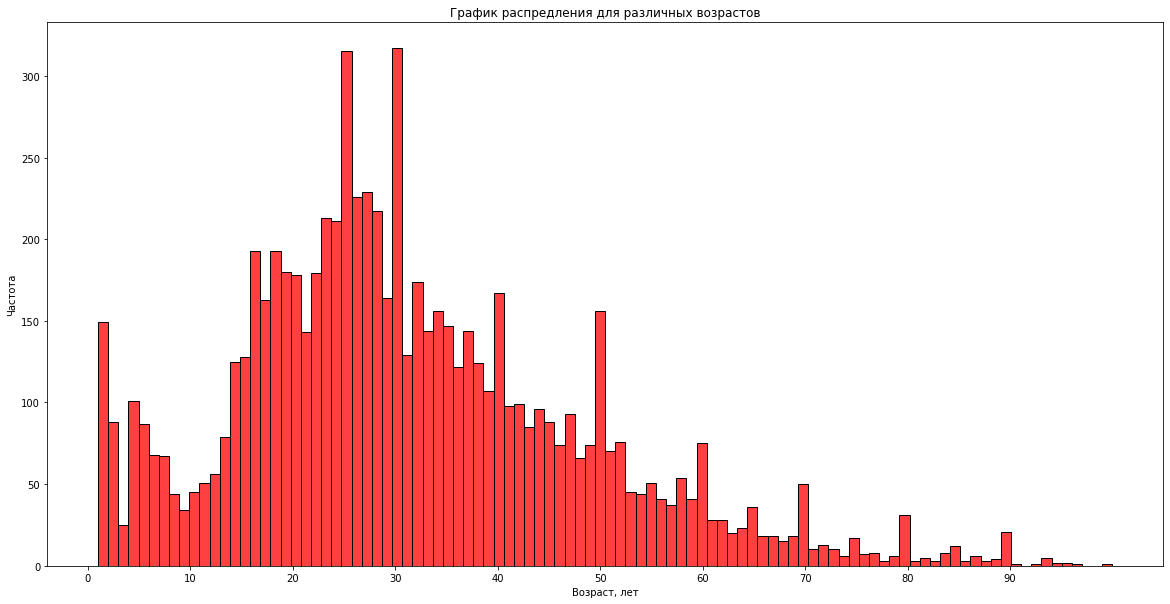

In [23]:
plt.figure(figsize=[20, 10])
plt.title(f'График распредления для различных возрастов')
sns.histplot((labels['real_age']), color='r',bins = 100)
plt.xlabel('Возраст, лет')
plt.ylabel('Частота')
plt.xticks(range(0,100,10))
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Информативная гистограмма. Молодец, что не забываешь про оформление графиков: есть название и подписи осей.</div>

Исходя из предыдущего анализа можно сделать вывод, что в основном в выборке можно заметить людей в возрасте `от 20 до 41 года`, медиана также равна `30 годам`.

Из графика следует, что большие всплески наблюдается на **круглые даты**, т.е. многих людей разметили примерно до ближайшей круглой даты. В выборке также наблюдается большое количество детей **1 года**, возможно их фотографировали новорожденными (например данные брали из роддомов).

Извлечем фотографии из папок и изобразим случайные **15** для первичного осмотра предоставленных данных 

In [24]:
datagen = ImageDataGenerator(rescale=1./255)
gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)
features, target = next(gen_flow)
features.shape

Found 7591 validated image filenames.


(32, 224, 224, 3)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Верно использован ImageDataGenerator как инструмент для доступа к потоку фотографий. Но обрати внимание на название переменных train_datagen  и train_gen_flow. На мой взгляд они не соответсвуют тому, что в них, ведь ты еще не производишь разделение потоков фотографий на обучающий и валидационный наборы.   
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>

Замечания учтены.    
    
Названия перменных изменены, так как это общая выборка данных, еще до разделения и классификации на обучающую и трейновую.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

Размер выборки изображений - `размер батча 32`, изображения размером `224х224 и тремя каналами`.

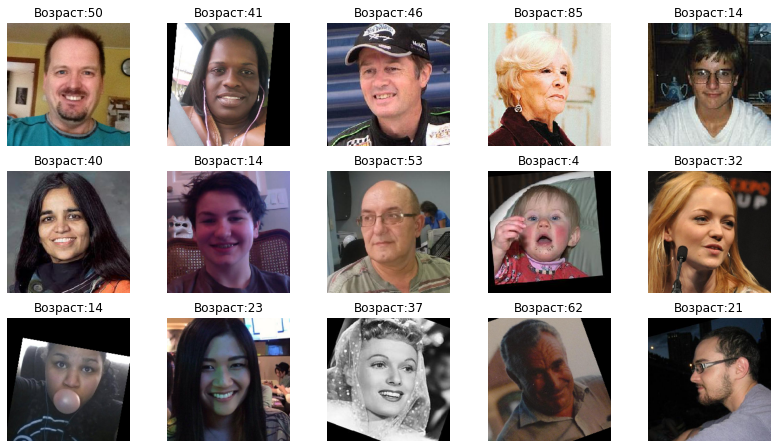

In [25]:
figure, ax = plt.subplots(3,5, figsize=(10, 10))
c = 0  
for i in range(15):
    ax[c,(i-c*5)].imshow(features[i])
    ax[c,(i-c*5)].set_title(f'Возраст:{target[i]}')
    ax[c,(i-c*5)].axis('off')
    if i == 4 or i==9: c+=1      

plt.subplots_adjust(right=1.2,bottom= 0.3)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошо, что выведены фотографии. Это хорошая практика, помогает увидеть изображения, с которыми будет работать наша модель, заметить какие-то детали и особенности, улучшить понимание задачи и получить определенную интуицию. А также заранее оценить подходящие для наших данных методы аугментации. </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Кстати, можно дополнительно вывести возраст человека на фото, он содержится в переменной target. </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Советую убрать шкалу с размерами. Она отвлекает нас от самих картинок, а исходный размер изображения мы и так знаем.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
   
Замечания учтены.

Оси убраны, также `добавлен возраст людей` на картинке.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 🔥 </div>

Можно сказать, что на изображениях только **люди**.

Некоторые фотографии `черно-белые`, некоторые взяты с `фотосессий`, в части фотографий `плохо видно лицо`. Данные достаточно разношерстные, что мне кажется хорошо скажется на обучении.

Можно заметить, что все изображения отцентрированны так, чтобы лицо человека было **посередине** и ровно **по вертикальной оси**, что упростит определение лица человека.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
🔥</div>

## Обучение модели

Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке

```python

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50


def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25,
                                       horizontal_flip=True,
                                       rescale=1/255.)
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path+"/final_files/",
        x_col='file_name',
        y_col='real_age',
        batch_size=32,
        target_size=(224, 224),
        subset='training',
        class_mode='raw',
        seed=12345)
    return train_datagen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255.)
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path+'/final_files/',
        x_col='file_name',
        y_col='real_age',
        batch_size=32,
        target_size=(224, 224),
        subset='validation',
        class_mode='raw',
        seed=12345)
    return test_datagen_flow

def create_model(input_shape):
    backbone = ResNet50(input_shape = input_shape,
                        weights = 'imagenet',
                        include_top = False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=Adam(lr=0.0001),
                  loss='mean_squared_error',
                  metrics=['mae'])
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=12,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model

```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Написаны функции для создания датагенераторов, а также создания и обучения модели. 
<hr>   
Молодец, что используешь агументацию для обучающего набора. 
<hr>   
    
Правильный выбор лосс-функции, также хорошо подобран шаг обучения.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В функции create_model уже есть аргумент input_shape, рекомендую передать его в функцию ResNet50, а не передавать жестко заданные (224, 224, 3).

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Обрати внимание, что при обучении ты используешь vertical_flip, т.е. учишь модель распознавать возраст на фото вверх ногами. Нужно ли это?

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
   
Замечания учтены.
    
В функции **create_model** используется вводный параметр **input_shape**.
    
Также убран параметр для аугментации - **vertical_flip**, что улучшило MAE модели на `11 процентов`.
    
До — **MAE = 6.5** и после — **MAE = 5.8**
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

```

Train for 178 steps, validate for 60 steps
Epoch 1/12
178/178 - 49s - loss: 244.9285 - mae: 11.2067 - val_loss: 950.8293 - val_mae: 26.0526
Epoch 2/12
178/178 - 41s - loss: 77.0891 - mae: 6.5546 - val_loss: 582.6754 - val_mae: 18.8113
Epoch 3/12
178/178 - 41s - loss: 49.4688 - mae: 5.3557 - val_loss: 275.7667 - val_mae: 11.9256
Epoch 4/12
178/178 - 40s - loss: 36.0320 - mae: 4.5791 - val_loss: 117.4588 - val_mae: 8.0905
Epoch 5/12
178/178 - 41s - loss: 27.2027 - mae: 3.9774 - val_loss: 82.4602 - val_mae: 6.8404
Epoch 6/12
178/178 - 40s - loss: 21.1561 - mae: 3.5331 - val_loss: 70.4047 - val_mae: 6.2217
Epoch 7/12
178/178 - 40s - loss: 16.7642 - mae: 3.1469 - val_loss: 65.8966 - val_mae: 6.1266
Epoch 8/12
178/178 - 41s - loss: 14.7639 - mae: 2.9631 - val_loss: 65.1115 - val_mae: 5.9708
Epoch 9/12
178/178 - 40s - loss: 11.9240 - mae: 2.6088 - val_loss: 67.3608 - val_mae: 6.2676
Epoch 10/12
178/178 - 40s - loss: 10.3650 - mae: 2.4707 - val_loss: 64.3835 - val_mae: 6.1544
Epoch 11/12
178/178 - 39s - loss: 9.5270 - mae: 2.3112 - val_loss: 71.5291 - val_mae: 6.2489
Epoch 12/12
178/178 - 38s - loss: 8.6198 - mae: 2.1999 - val_loss: 61.1406 - val_mae: 5.8107

60/60 - 10s - loss: 61.1406 - mae: 5.8107
Test MAE: 5.8107


```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Модель обучена и преодолела планку требуемой точности </div>

## Анализ обученной модели

В данном проекте основной задачей являлось построение модели, которая по фотографии определит приблизительный возраст человека. В нашем распоряжении набор фотографий людей с указанием возраста, данные предоставлены компанией «Хлеб-Соль».

Нужно было провести исследовательский анализ набора фотографий и подготовьте данные к обучению, в ходе были сделаны некоторые выводы:
- Фотографии могут быть `черно-белые`, взяты с `фотосессий` или с `плохой видимостью лица`
- Все изображения отцентрированны
- В выборке в основном люди в возрасте `от 20 до 41 года`, медиана равна `30 годам`
- Возраст некоторых людей разметили до ближайшей круглой даты

Далее требовалось обучите нейронную сеть и рассчитайте её качество.

Была выбранна предобученная модель **ResNet50**, она обучена на данных из базы **ImageNet** и классифицирует 1000 объектов.
Обчение проходило с помощью библиотеки Keras и были использованы некоторые улучшения:

- добавлен слой `GlobalAveragePooling2D` и `Dense` с активацией нейронов **ReLU** с единственным выходом.
- был выбран оптимизатор **Adam**

В результате обучения метрика `MAE` равна **2.2** на трейне и **5.8** на тесте. Хоть ошибка и меньше **5.8 лет**, но это несовсем идеальная точность определения возраста, так что следует данный момент обсудить с представителями компании «Хлеб-Соль».


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, очень подробно рассмотрены основные моменты, касающиеся построения сети и её обучения.


</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Проект принят. Поздравляю и желаю дальнейших успехов!
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Давай подведем итоги. 
Ты провел содержательный EDA, а также использовал предобученную модель и c помощью finetuning и transfer-learning обучил нейронку определять возраст покупателей. Требуемая точность получена. 
    
    
У меня нет критичных замечаний к твоей работе. Проект может быть принят уже сейчас. Возвращаю проект чтобы дать тебе возможность ознакомиться с моими комментариями, возможно у тебя возникнет желание задать вопросы или внести корректировки в проект.
    
    
        
Жду твой проект на фина/льное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Давай подведем итоги. 
Ты провел содержательный EDA, а также использовал предобученную модель и c помощью finetuning и transfer-learning обучил нейронку определять возраст покупателей. Требуемая точность получена. 
    
    
Что нужно доработать обязательно:
    
  - Пожалуйста доработай оформление гистограммы
  - Пожалуйста доработай выводы в разделе "Разведочный анализ данных".
  - Пожалуйста доработай "Анализ обученной модели"  
  
    
    
        
Жду твой проект на финальное ревью :)
</div>